# Práctica 5 de IA

## 1. Construcción de clasificadores en bases de datos sintéticas

In [1]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

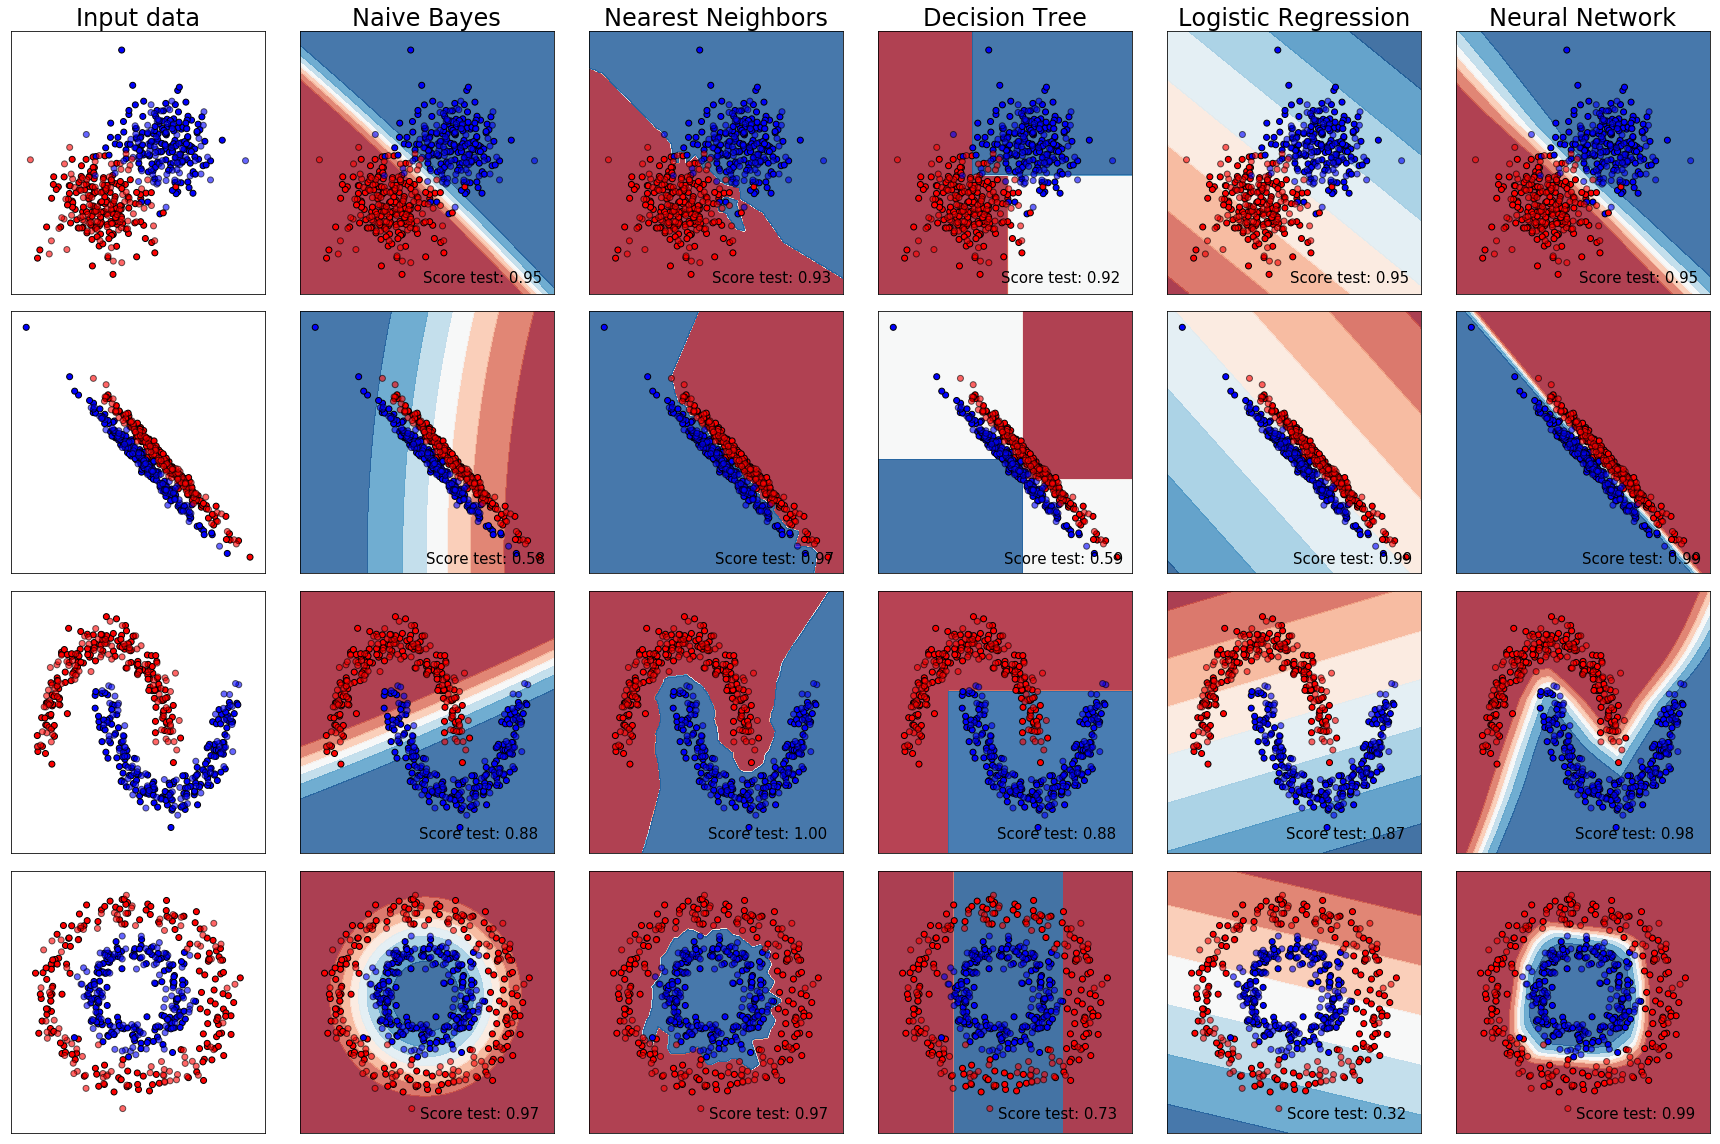

In [4]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=1)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=2)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e10)), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,), # tamaño capas ocultas
                              max_iter=1000, # número máximo de iteraciones
                              alpha=0))] # factor de regularización

from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

In [5]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB(priors=None)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, ma

Prueba a cambiar los siguientes parámetros y observa las consecuencias en la frontera de clasificación construida:

* Número de vecinos en k-nn: Prueba a ir subiendo este número. ¿Por qué siempre debe ser impar cuando hay dos clases?
* Profundidad máxima de los árboles de decisión: Prueba a ir subiendo este número.
* Factor de regularización (C) en la regresión logística: prueba C=1e10, C=1 y C=1e-7.
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. ** Nota: ** (50,) indica una única capa oculta con 50 neuronas. Prueba a reducir este número. También puedes probar a introducir más de una capa oculta. Por ejemplo, (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente; (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

** KNN **

- Cuando hay dos clases el número de vecinos elegido debe ser impar para evitar empates.
- Cuanto más aumentamos el número de vecinos, peor es el resultado. Hay que encontrar un número que no sea ni muy grande ni muy pequeño. En este caso números adecuados podrían ser entre 7 y 11 vecinos.  

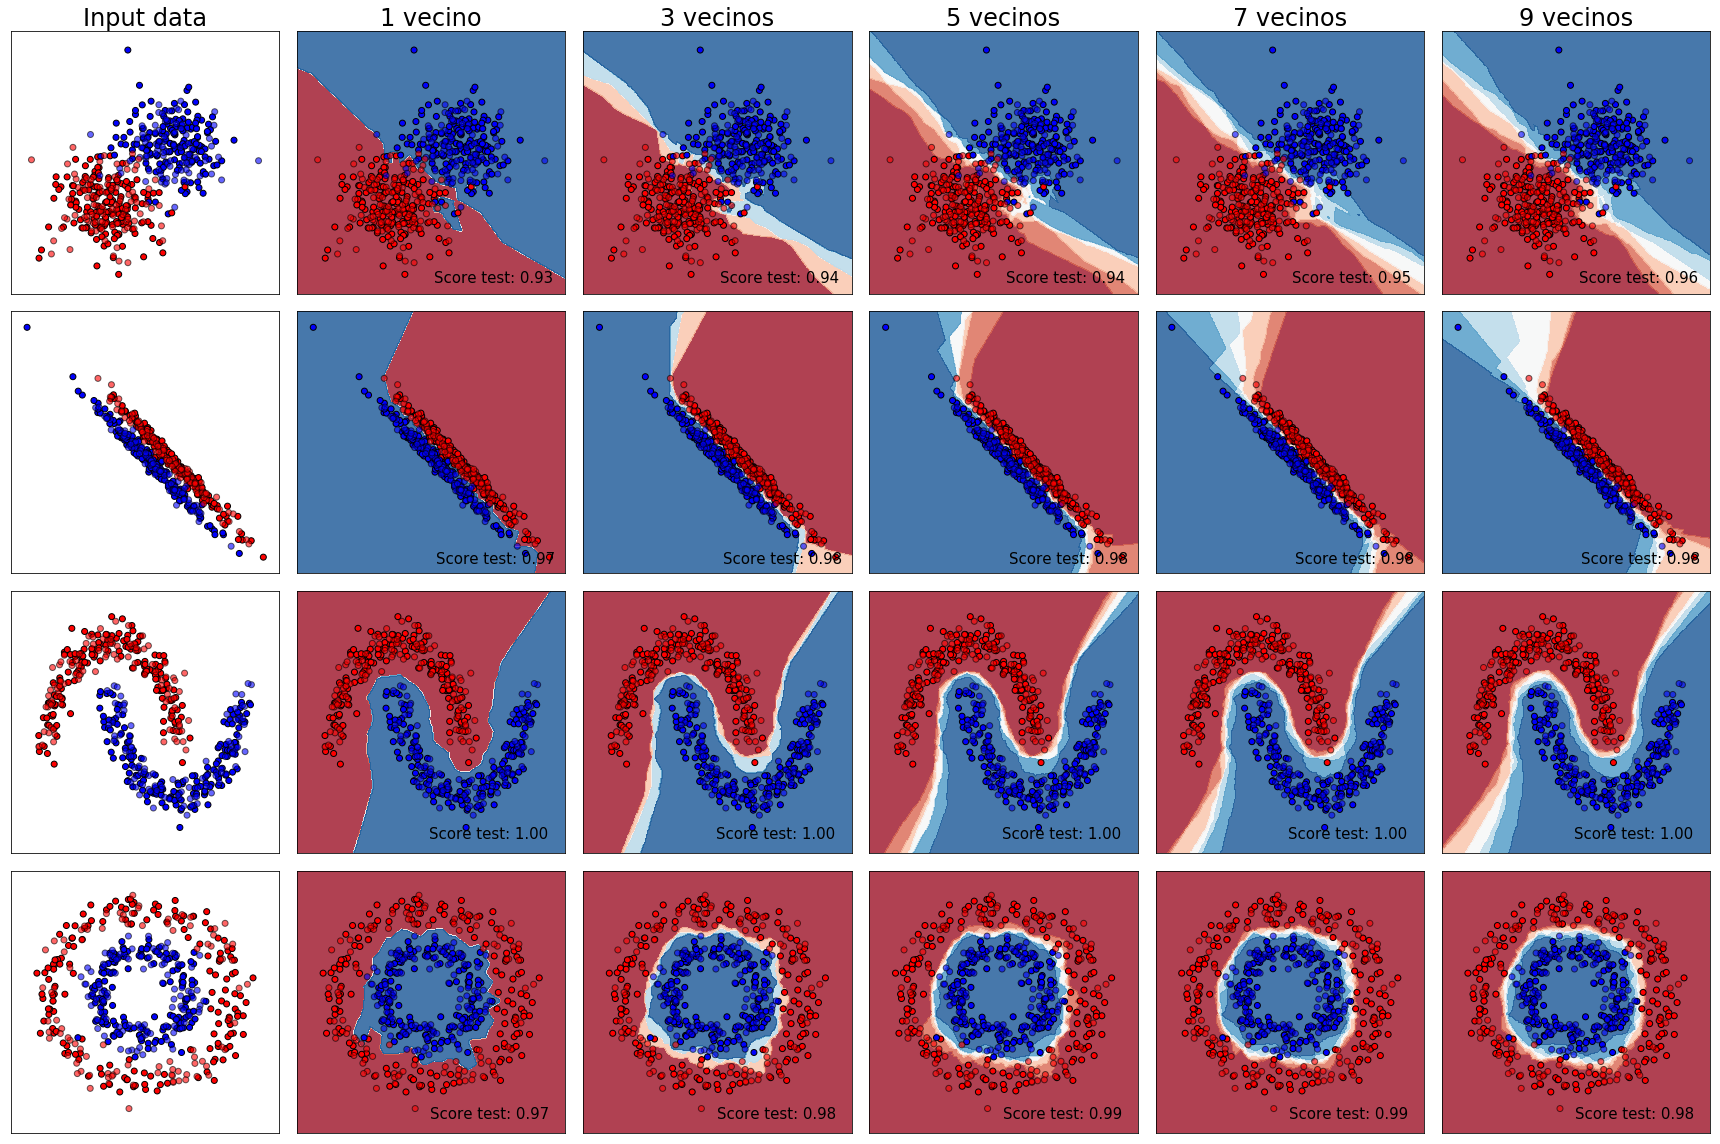

In [6]:
classifiers = [("1 vecino", KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')),
               ("3 vecinos", KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')),
               ("5 vecinos", KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')),
               ("7 vecinos", KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')),
               ("9 vecinos", KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform'))]

from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

** Árboles de decisión **

A medida que aumentamos la profundidad vemos que el resultado mejora, pero llega un momento en el que aunque aumentemos la profundidad no se ve mucha diferencia en los resultados

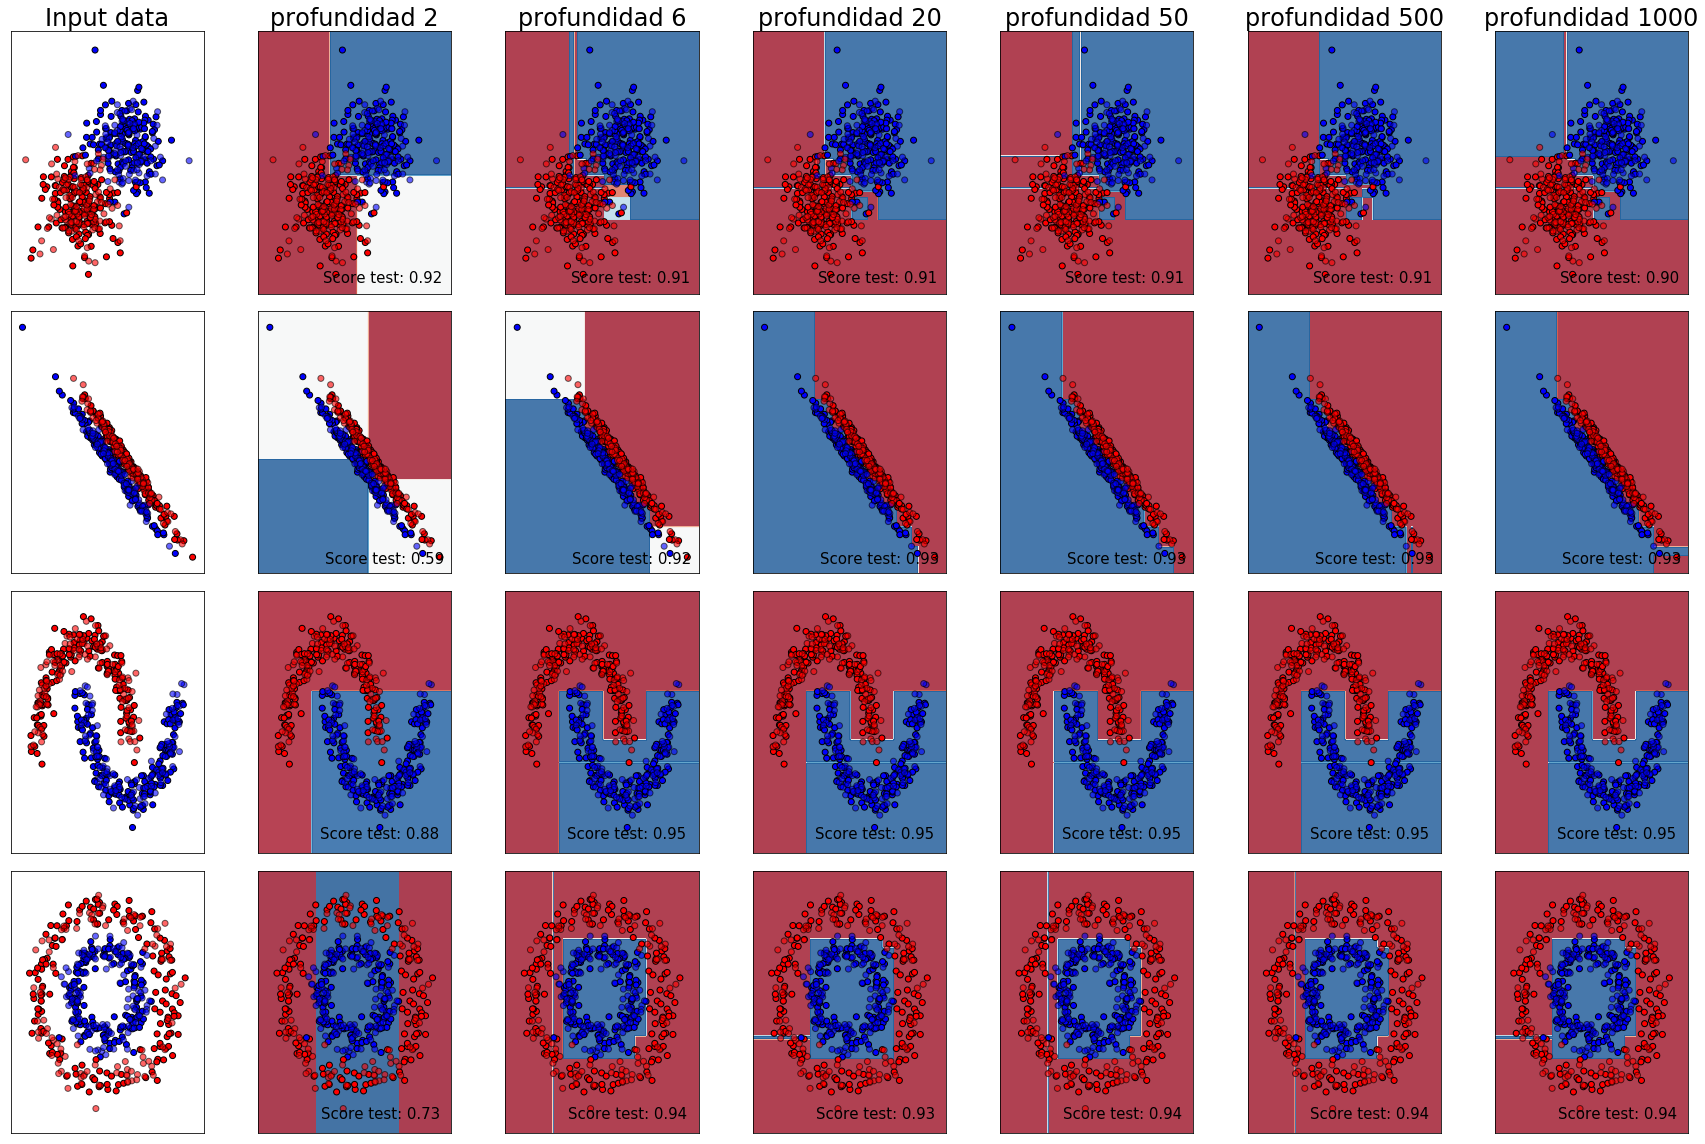

In [7]:
classifiers = [("profundidad 2", DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')),
               ("profundidad 6", DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')),
               ("profundidad 20", DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')),
               ("profundidad 50", DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')),
               ("profundidad 500", DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=500,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')),
               ("profundidad 1000", DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]

from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)               

** Factor de regularización **

El mejor resultado se da con C=1 por lo que podemos deducir que valores muy altos o muy bajos no producen buenos resultados

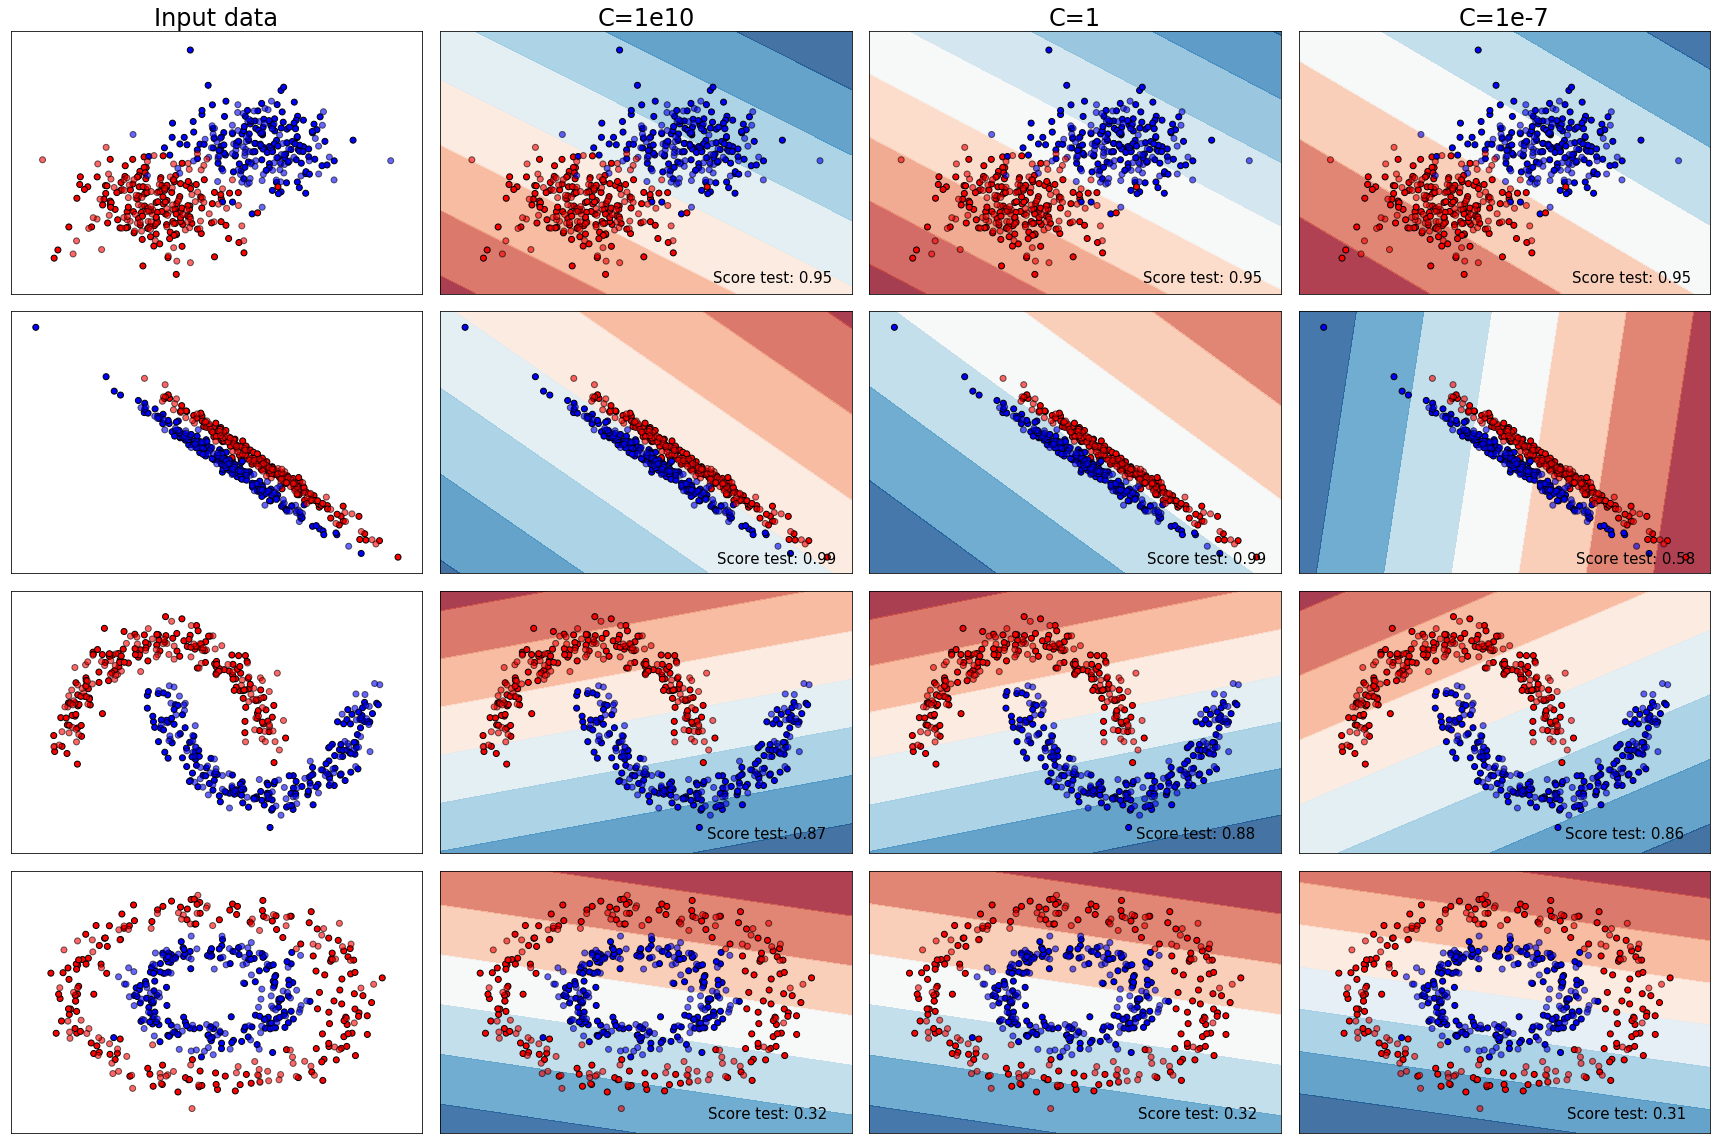

In [8]:
classifiers = [("C=1e10", LogisticRegression(C=1e10, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)),
               ("C=1", LogisticRegression(C=1, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)),
               ("C=1e-7", LogisticRegression(C=1e-7, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]
                
from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

** Redes neuronales **

Los mejores resultados se obtienen en los casos en los que hay más capas de neuronas

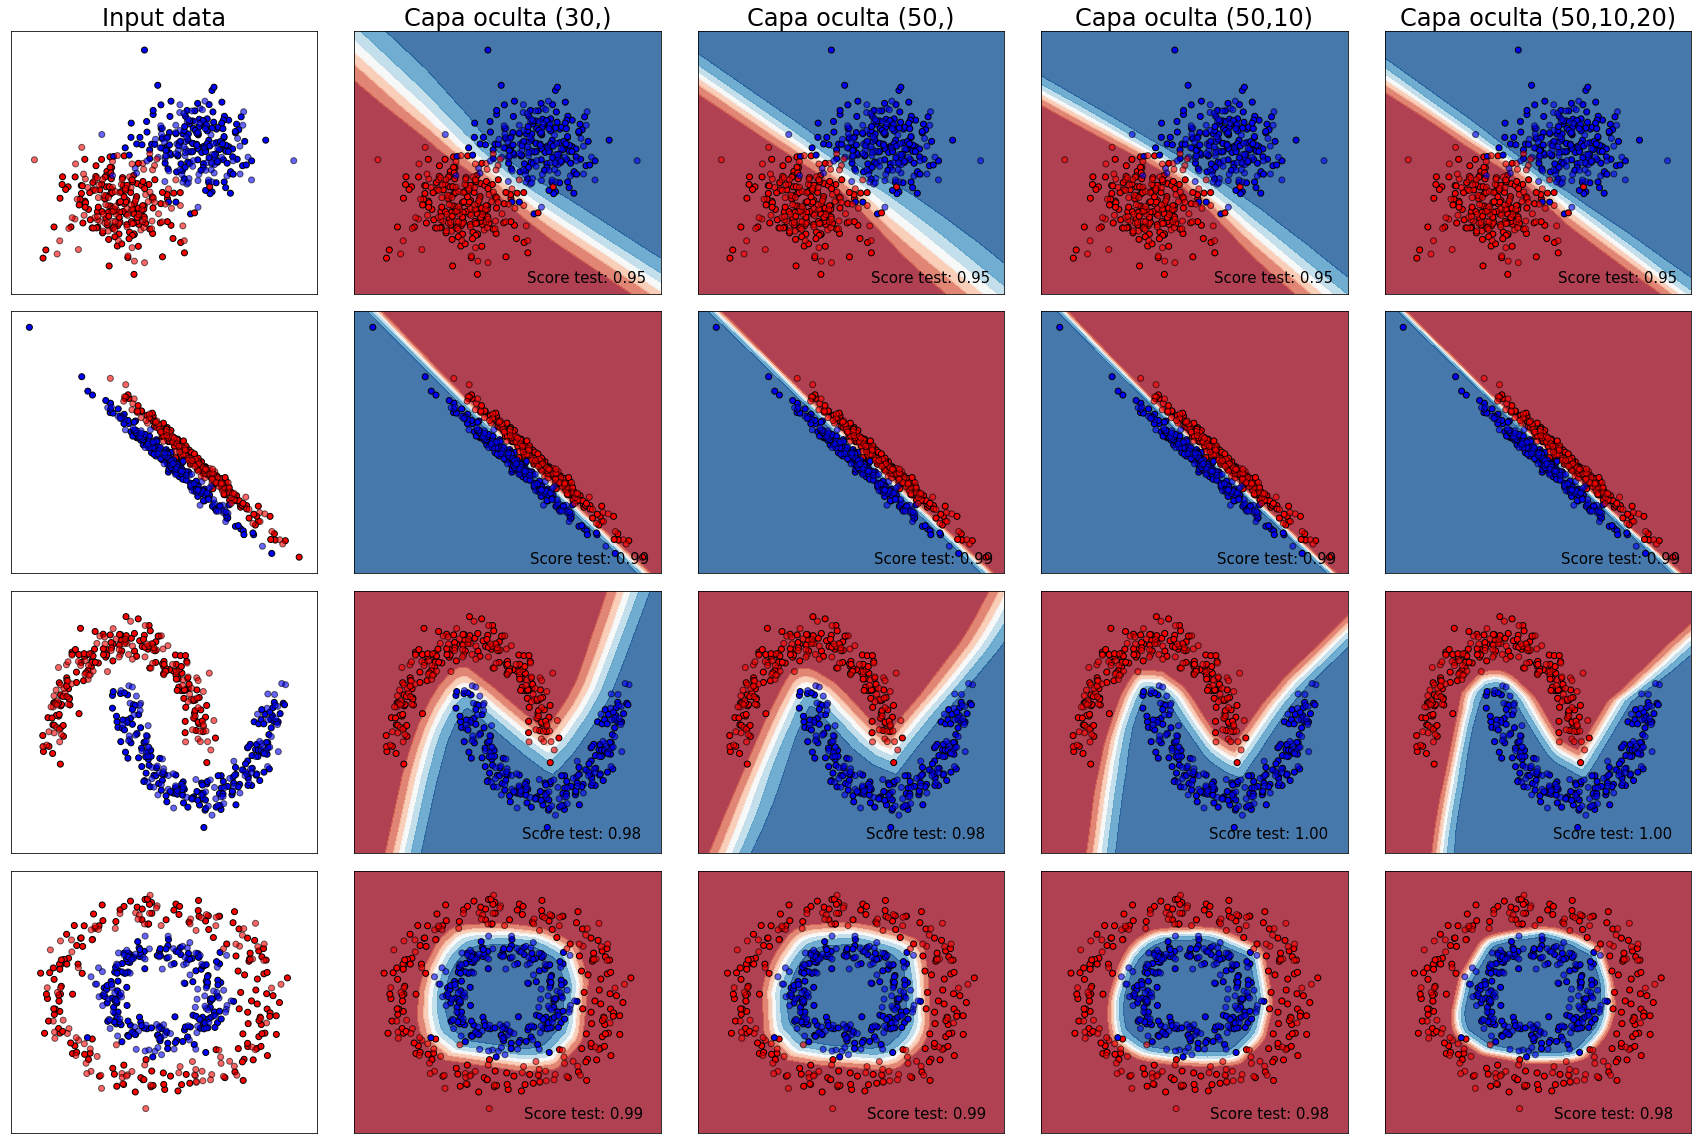

In [9]:
classifiers = [("Capa oculta (30,)", MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)),
              ("Capa oculta (50,)", MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)),
              ("Capa oculta (50,10)", MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)),
              ("Capa oculta (50,10,20)", MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,10,20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]

from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

# 2. Construcción de un clasificador en una base de datos real

In [10]:
import pandas as pd
df = pd.read_csv("pima_construccion.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(668, 9)


numPregnant  glucose  bloodPress  skinThick  insulin  massIndex  pedigree  \
0            6      148          72         35        0       33.6     0.627   
1            1       85          66         29        0       26.6     0.351   
2            8      183          64          0        0       23.3     0.672   
3            1       89          66         23       94       28.1     0.167   
4            0      137          40         35      168       43.1     2.288   

   age class  
0   50   yes  
1   31    no  
2   32   yes  
3   21    no  
4   33   yes

* ** Pregnancies: ** Number of times pregnant
* ** Glucose: ** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* ** BloodPressure: ** Diastolic blood pressure (mm Hg)
* ** SkinThickness: ** Triceps skin fold thickness (mm)
* ** Insulin: ** 2-Hour serum insulin (mu U/ml)
* ** BMI: ** Body mass index (weight in kg/(height in m)^2)
* ** DiabetesPedigreeFunction: ** Diabetes pedigree function
* ** Age: ** Age (years)
* ** Class: ** Class variable (0 or 1)

In [11]:
df.describe()
# count -> numero de elementos en muestra
# mean -> media
# std -> desviación estándar
# min -> mínimo valor
# 25% -> F(0.25)
# 50% -> F(0.50)
# 75% -> F(0.75)
# max -> máximo valor

numPregnant     glucose  bloodPress   skinThick     insulin  \
count   668.000000  668.000000  668.000000  668.000000  668.000000   
mean      3.955090  120.640719   69.128743   20.564371   77.407186   
std       3.416744   31.893370   19.367082   15.986793  110.535247   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000   62.000000    0.000000    0.000000   
50%       3.000000  117.000000   72.000000   23.000000   22.500000   
75%       6.000000  140.250000   80.000000   32.000000  125.250000   
max      17.000000  199.000000  122.000000   99.000000  744.000000   

        massIndex    pedigree         age  
count  668.000000  668.000000  668.000000  
mean    32.084880    0.465904   33.416168  
std      7.852525    0.329423   11.926581  
min      0.000000    0.078000   21.000000  
25%     27.475000    0.240000   24.000000  
50%     32.250000    0.368000   29.000000  
75%     36.600000    0.614250   41.000000  
max     67.100000    2.420000   81.000000

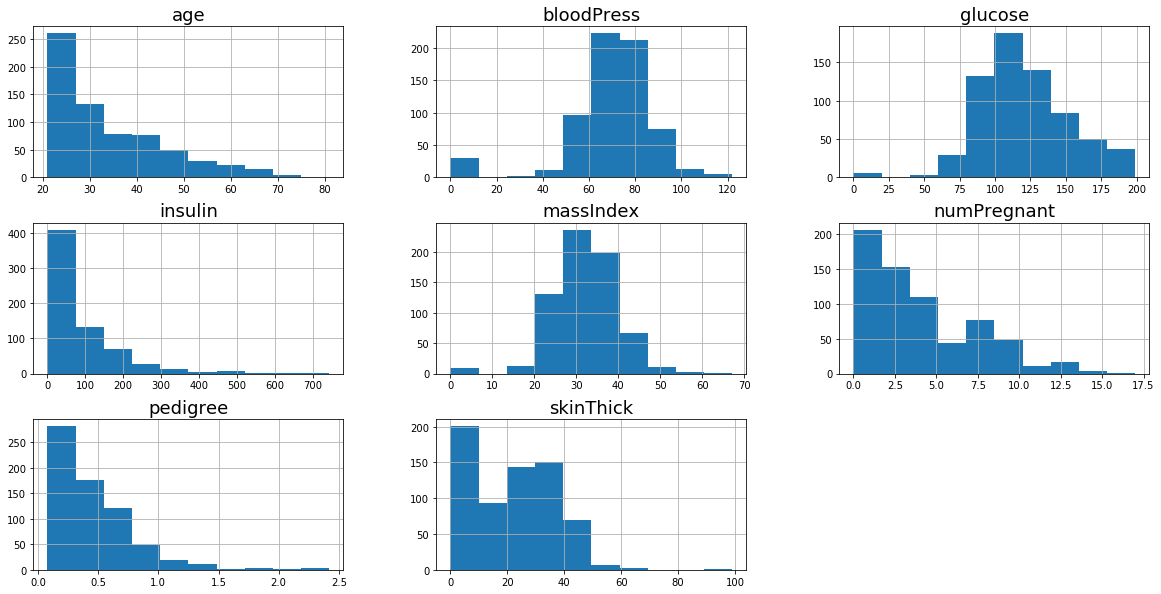

In [12]:
#### Histogram Matrix Plot
fig = df.hist(figsize=(20, 10))
[x.title.set_size(18) for x in fig.ravel()]
plt.show()
# Histogramas de los datos previos, de las 8 columnas con datos
# Se ve cuántos representantes hay en cada 'clase'

In [13]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class') #quitamos la columna 'class'
print(nombres_atrs)
#print(df['numPregnant'].values) #imprimiría una lista con el número de embarazos de cada persona
#print(df['class'].values) #imprimiría una lista con cada resultado de clase: 'yes' / 'no'
X = df[nombres_atrs].values #asignamos a X los valores de cada columna
y = df['class'].values #asignamos a Y la pertenencia a la clase

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


In [14]:
import collections
class_values = df['class'].values
collections.Counter(class_values) #contamos el número de elementos de cada clase: 'yes', 'no'

Counter({'no': 443, 'yes': 225})

In [15]:
p = df['numPregnant'].values
q = df['class'].values
collections.Counter(p==0) #Mujeres con 0 embarazos

Counter({False: 572, True: 96})

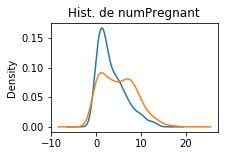

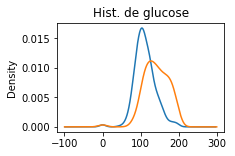

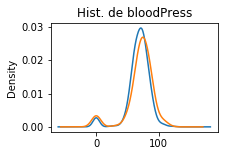

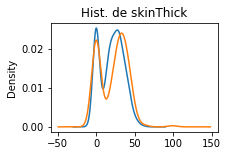

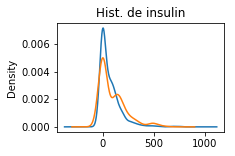

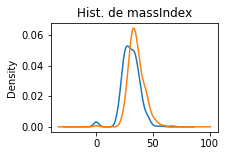

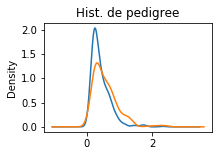

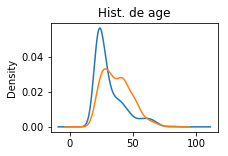

In [16]:
### Histogramas suavizados con diferentes clases
for n in nombres_atrs:
    plt.figure(figsize=(3,2))
    df.groupby("class")[n].plot(kind='kde', #cambiando kde por hist hace un gráfico de barras
                                title='Hist. de '+n) #el azul representa 'no' y el naranja 'si'
    plt.show()

In [17]:
from sklearn.model_selection import cross_val_score

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [34]:
#Arbol de decision
clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.7238806   0.73134328  0.71641791  0.78947368  0.76691729]
0.75 +/- 0.03


In [19]:
#Naive Bayes
nb = GaussianNB()
scores = cross_val_score(nb, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.74626866  0.75373134  0.70149254  0.79699248  0.76691729]
0.75 +/- 0.03


In [25]:
#KNN
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.60447761  0.6641791   0.67164179  0.70676692  0.67669173]
0.66 +/- 0.03


In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.67164179  0.70149254  0.67910448  0.7518797   0.66165414]
0.69 +/- 0.03


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.7238806   0.69402985  0.70149254  0.79699248  0.70676692]
0.72 +/- 0.04


In [28]:
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.73134328  0.70895522  0.67910448  0.79699248  0.73684211]
0.73 +/- 0.04


In [29]:
knn = KNeighborsClassifier(n_neighbors=9)
scores = cross_val_score(knn, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.75373134  0.70149254  0.69402985  0.80451128  0.72932331]
0.74 +/- 0.04


In [37]:
#Regresion logica
rl = LogisticRegression(C=1)
scores = cross_val_score(rl, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.7761194   0.76865672  0.74626866  0.80451128  0.78195489]
0.78 +/- 0.02


In [39]:
#Red neuronal
rn =  MLPClassifier(hidden_layer_sizes=(50,10,20), # tamaño capas ocultas
                              max_iter=1000, # número máximo de iteraciones
                              alpha=0) # factor de regularización
scores = cross_val_score(rn, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores:  [ 0.6641791   0.64925373  0.74626866  0.72180451  0.5037594 ]
0.66 +/- 0.08


## Ajuste final del modelo usando todos los datos y predicción del conjunto de explotación

El modelo seleccionado en la celda anterior se ajustará ahora usando todos los datos etiquetados disponibles, y se usará para predecir datos no etiquetados (base de datos de "explotación"). Se guardarán dichas predicciones en el archivo de predicciones de explotación.

In [13]:
clf.fit(X, y) #Cambiar clf por el clasificador que tenga una media mas alta

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
df_explotacion = pd.read_csv("pima_explotacion.csv", header=0, sep=',')
df_explotacion.head(5)

numPregnant  glucose  bloodPress  skinThick  insulin  massIndex  pedigree  \
0            2      197          70         45      543       30.5     0.158   
1            8      125          96          0        0        0.0     0.232   
2            4      110          92          0        0       37.6     0.191   
3           10      168          74          0        0       38.0     0.537   
4           10      139          80          0        0       27.1     1.441   

   age  class  
0   53    NaN  
1   54    NaN  
2   30    NaN  
3   34    NaN  
4   57    NaN

In [15]:
X_explotacion = df_explotacion[nombres_atrs].values
predicciones = clf.predict(X_explotacion) #Cambiar clf

f = open("predicciones_explotacion.txt", "w")
for pred in predicciones:
    f.write(str(pred)+"\n")
f.close()